In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="ticks")

pd.set_option('display.max_rows', None)


In [2]:
df=pd.read_parquet('ajpdata_full.parquet')

In [3]:
df1=df[df.belt.isin(['White', 'Blue', 'Purple',  'Black','Brown'])]


In [4]:
print(df.shape)
print(df1.shape)

(242258, 14)
(164511, 14)


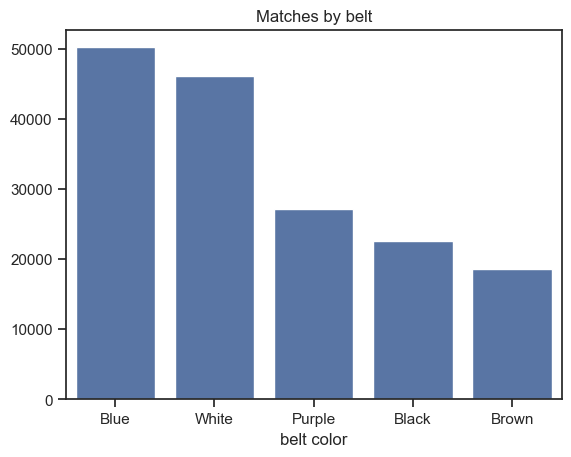

In [5]:
sns.barplot(x=df1.belt.value_counts().index, y=df1.belt.value_counts().values)

plt.xlabel('belt color')
plt.title('Matches by belt')
plt.show()

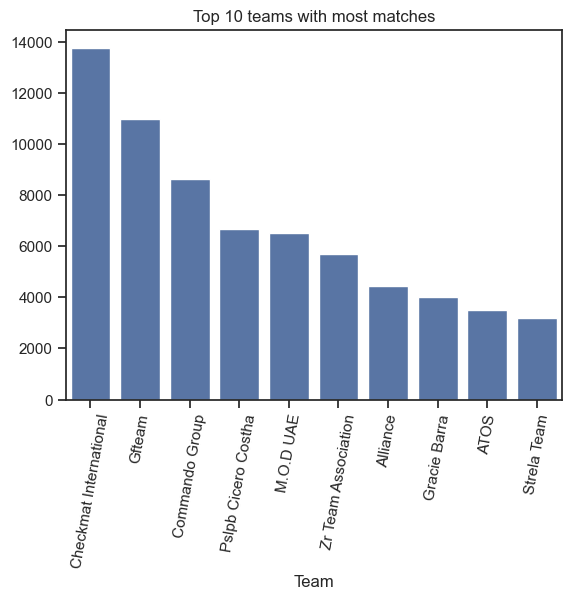

In [6]:
teams=pd.concat([df1.team1, df1.team2])
sns.barplot(x=teams[teams!=''].value_counts().head(10).index, y=teams[teams!=''].value_counts().head(10).values)
plt.xlabel('Team')
plt.xticks(rotation=80)
plt.title('Top 10 teams with most matches')
plt.show()

In [7]:
df1['winner_team'] = np.where(
    df1['winner'].isna() | (df1['winner'] == ''),
    '',
    np.where(df1['winner'] == df1['athlete1'], df1['team1'], df1['team2'])
)

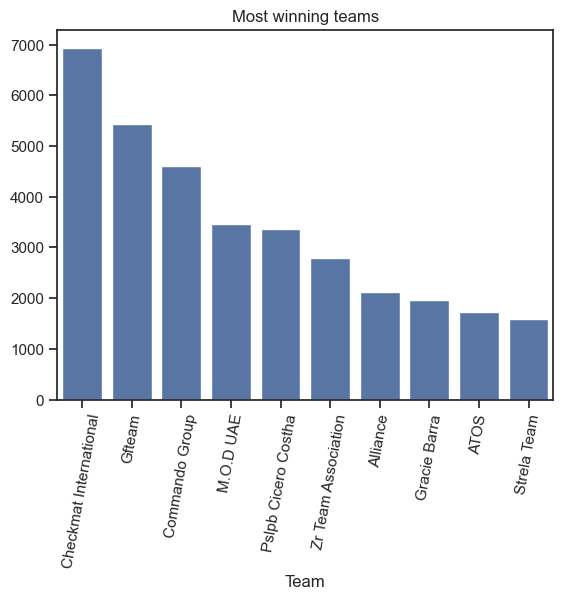

In [8]:
sns.barplot(x=df1[df1['winner_team']!=''].winner_team.value_counts().head(10).index, y=df1[df1['winner_team']!=''].winner_team.value_counts().head(10).values)
plt.xlabel('Team')
plt.xticks(rotation=80)
plt.title('Most winning teams')
plt.show()

In [9]:
df1.winner_via=df1.winner_via.replace('','No Information')

In [10]:
df1['winner_via_grouped']=df1['winner_via'].replace({
    'points':'Points',
    'Disqualification': 'Others',
    'No Information': 'Others',
    'Stoppage': 'Others'
})

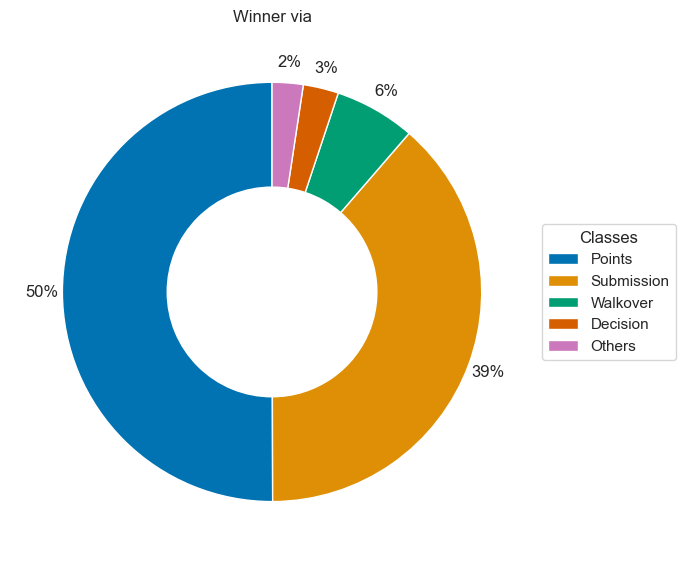

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
labels=df1.winner_via_grouped.value_counts().index
colors = sns.color_palette('colorblind')

wedges, texts, autotexts = ax.pie(
    df1.winner_via_grouped.value_counts().values,
    colors=colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
    pctdistance=1.1
)


ax.legend(wedges, labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Winner via')
plt.tight_layout()
plt.show()

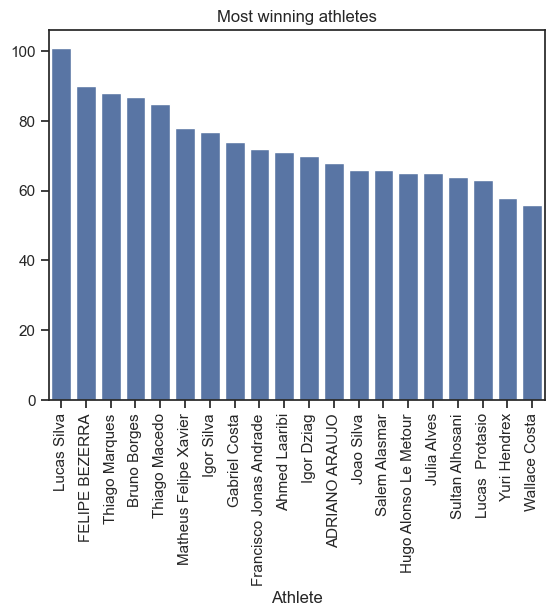

In [12]:
winners=df1[~df1['winner'].isin(['','Unknown User'])]
top_winners=winners.winner.value_counts().head(20)
sns.barplot(x=top_winners.index, y=top_winners.values)
plt.xlabel('Athlete')
plt.xticks(rotation=90)
plt.title('Most winning athletes')
plt.show()

In [16]:
df1.head()

,athlete1,team1,athlete2,team2,winner,winner_via,time,category,belt,type,weight,day,event,year,winner_team,winner_via_grouped
0,HIROUMI SATO,Sendai Jiu-Jitsu Academy,YUSHIN SATO,Sendai Jiu-Jitsu Academy,HIROUMI SATO,points,03:00,Boys,White,Infant,50KG,,SENDAI INTERNATIONAL PRO JIU-JITSU CHAMPIONSHI...,2025,Sendai Jiu-Jitsu Academy,Points
1,TASUKU MORIWAKI,Sendai Jiu-Jitsu Academy,TOMOYASU NOBEYAMA,Sendai Jiu-Jitsu Academy,,points,05:00,Male,White,Adult,77KG,,SENDAI INTERNATIONAL PRO JIU-JITSU CHAMPIONSHI...,2025,,Points
2,YOSHIFURU SHOJI,Sendai Jiu-Jitsu Academy,YUSHIN SATO,Sendai Jiu-Jitsu Academy,YOSHIFURU SHOJI,points,03:00,Boys,White,Infant,50KG,,SENDAI INTERNATIONAL PRO JIU-JITSU CHAMPIONSHI...,2025,Sendai Jiu-Jitsu Academy,Points
3,TAKETO KATO,Sendai Jiu-Jitsu Academy,Sena Murakami,Sendai Jiu-Jitsu Academy,TAKETO KATO,points,05:00,Male,White,Adult,94KG,,SENDAI INTERNATIONAL PRO JIU-JITSU CHAMPIONSHI...,2025,Sendai Jiu-Jitsu Academy,Points
4,HIROUMI SATO,Sendai Jiu-Jitsu Academy,YOSHIFURU SHOJI,Sendai Jiu-Jitsu Academy,HIROUMI SATO,Decision,03:00,Boys,White,Infant,50KG,,SENDAI INTERNATIONAL PRO JIU-JITSU CHAMPIONSHI...,2025,Sendai Jiu-Jitsu Academy,Decision


In [ ]:
df1.pivot_table(index='winner_team', columns='winner_via', values='winner_team', aggfunc='count')